# Recommendation Systems
Author: Abhishek Narvekar<br>
Student number: 649744<br>
Date: 01/05/2023<br>
Dataset taken from: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ <br>
Dataset is used based on the recommendation of Mr Peter Stikker.

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* pandas <br>

From these we will need the following libraries:

In [1]:
# enter here all those 'from .... import ....'
try:
    import pandas as pd
    print("pandas already installed, only imported")
except:
    !pip install pandas
    print("pandas was not installed, installed and imported")

pandas already installed, only imported


# 1. The Item-Based Recommender

We are going to build an item-based recommender for **Books**. In this recommender we could for example **recommend a book based on the higher rating given by that particular user for some other books. So for example let us consider that someone is fond of Book A and rates Book A with a very high rating. We will find out a strong positive correlation between those books that matches with the correlation of Book A. So this would indicate to us that if someone has given a higher ratings to those books then they must have maybe given a higer rating to that particular Book A. So therefore we can recommend that book to the person. We will be using the item memory based recommendation system, wherein we check which users liked a particular book the most based on the ratings given by the user. We will then compare if there is any other books that was given about the same ratings as the user gave, and if that is the case then we recommend that book to the user. In order to give a recommendation of a book based on the rating, we will be using two datasets mentioned in (.csv) format. The 'BX-Book-Ratings.csv' and the 'BX-Books.csv' dataset**.

To begin we'll need to load some data.

In [2]:
# enter code to load your example data file(s)
bookRatingsDF = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding= 'unicode_escape')
bookNamesDF = pd.read_csv('BX-Books.csv', sep=';', encoding='unicode_escape', on_bad_lines='skip')

C:\Users\abhis\AppData\Local\Temp\ipykernel_8976\98728766.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  bookNamesDF = pd.read_csv('BX-Books.csv', sep=';', encoding='unicode_escape', on_bad_lines='skip')


In this chapter we will be using two datafiles which are: 'BX-Book-Ratings.csv' and 'BX-Books.csv'.

The description of what each datafile contains is shown below.

**BX-Book-Ratings.csv**
This dataset consists of the ratings given for that particular book. It ranges from the scale of 0 till 10. zero being the lowest and 10 being the highest. This file uses 'User-ID' to track the ratings of each particular user, followed by the 'ISBN' which is the unique code for that book and last but not least the 'ratings' section which contains the ratings from 0 till 10.

**BX-Books.csv**
This dataset consists of all the information about the contents of the books and includes the following:
* The title of the book in the column 'Book-Title'
* The author of the book in the column 'Book-Author'
* The publication year in the column 'Year-Of-Publication'
* The publisher in the column 'Publisher'
* The other remaining columns show the cover images of the book these ranges in three different categories: small, medium and large. In this notebook we don't really need these columns to perform recommendation.

This information is taken from link: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ which was then originally obtained from the Amazon Web Services.  

Since we are recommending books based on rating, We know that the book information is inside the BX-Books.csv and the ratings for each particular book is on BX-Book-Ratings.csv. Both of these datasets uses ISBN to track the records of each book, So we will merge the two datasets based on ISBN, which is shown in the next code cell below: 

In [3]:
# Optional depending on your dataset, enter code to select appropriate columns, and merge the files.

#We only need the book isbn, title and author. so let's select those only.
bookNamesDF= bookNamesDF[['ISBN', 'Book-Title', 'Book-Author']]

#merge two datasets of Books and ratings based on ISBN 
booksDF = pd.merge(bookNamesDF, bookRatingsDF, on='ISBN')

# since our dataset is extremely big we will perform subsetting:
booksSubsetDF = booksDF[(booksDF['User-ID'] >= 1000) & (booksDF['User-ID'] < 30000) & (booksDF['Book-Rating'] >= 0)]
booksSubsetDF.dropna()
booksSubsetDF.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
16,0060973129,Decision in Normandy,Carlo D'Este,2954,8
31,0399135782,The Kitchen God's Wife,Amy Tan,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,29526,9


We need one row per user, and his/her scores or ratings for each Book. We can do this by creating a pivot table.

In [4]:
# code to create pivot table
books_matrix = booksSubsetDF.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
books_matrix.head()

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Beyond IBM: Leadership Marketing and Finance for the 1990s,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),It Takes Two,"Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Mystery Mile,"Q-Space (Star Trek The Next Generation, Book 47)",Tales of Terror and Suspense,...,"Â¡Corre, perro, corre!",Â¿QuiÃ©n se ha llevado mi queso?,"Â¿QuÃ© me quieres, amor?",Ã?rsringen: Roman,Ã?Â?ber das Fernsehen.,Ã?Â?ber die Freiheit.,Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,Ã?Â?bermorgen.,Ã?Â?lpiraten.,Ã?Â?thique en toc
User-ID,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also need to take the counts into consideration so lets keep those into their own dataframe, together with the average score:

In [5]:
# code to make a dataframe with the unique objects, their average score and the number of scores
bookRatings = pd.DataFrame(booksSubsetDF.groupby('Book-Title')['Book-Rating'].mean())
bookRatings['nrOfBookRatings'] = booksSubsetDF.groupby('Book-Title')['Book-Rating'].count()

bookRatings.sort_values(by=['nrOfBookRatings']).head()

,Book-Rating,nrOfBookRatings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,1
Relato soÃ±ado,8.0,1
"Relatos 1, Los - Ritos",7.0,1
"Relatos 2, Los - Juegos",6.0,1
Relatos de Los Inesperado,8.0,1


To decide on a cut-off point as minimum number of scores to be eligable we can plot the number of scores in a histogram:

<AxesSubplot:>

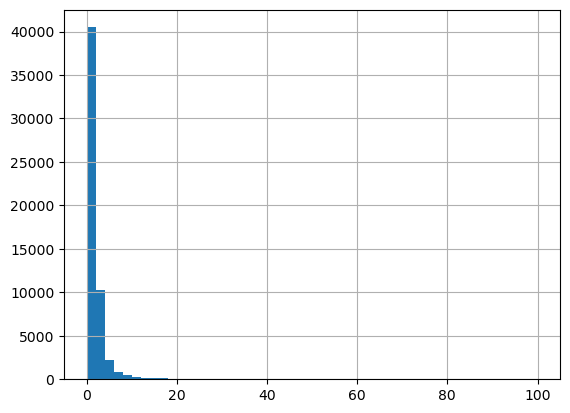

In [6]:
# code to generate the histogram
bookRatings['nrOfBookRatings'].hist(bins=50, range=(0,100))

From the histogram we can see that there seems to be quite a lot of books that consists of very few to none ratings. There are also very few number of books that are actually being rated. One of this reason could be due to the fact that we are subsetting the values in our dataset by reducing the number of users so we are loosing some portion of the book ratings due to subsetting. So based upon the histogram we have right now we have to remove the big peak since it is not very useful for us. I think a good threshold value in our dataset could be 2, because in that way we can incoperate more actual ratings of each and every particular book from our dataset. This can help in better recommending books to a user.

Finally we can create the code to perform a recommendation. First we can select one particular field let's say the book-title Clara Callan

In [7]:
# code to select one field
myBook = books_matrix['Clara Callan']
#create a correlation based on the book selected
book_correlation = books_matrix.corrwith(myBook).sort_values(ascending=False)

bookCorrDF = pd.DataFrame(book_correlation, columns=['Correlation'])
bookCorrDF.dropna(inplace=True)
bookCorrDF = bookCorrDF.sort_values('Correlation', ascending=False)
bookCorrDF = bookCorrDF.merge(bookRatings['nrOfBookRatings'], on='Book-Title')
bookCorrDF.head()

c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,nrOfBookRatings
Book-Title,,
Young Wives,1.0,6
The Red Tent (Bestselling Backlist),1.0,73
The Hours: A Novel,1.0,31
House of Sand and Fog,1.0,66
Big Cherry Holler: A Big Stone Gap Novel (Ballantine Reader's Circle),1.0,13


And then to find the recommendation based on the correlations.

In [8]:
# code to create the recommendation
bookCorrDF[bookCorrDF['nrOfBookRatings'] >= 2]

,Correlation,nrOfBookRatings
Book-Title,,
Young Wives,1.0,6
The Red Tent (Bestselling Backlist),1.0,73
The Hours: A Novel,1.0,31
House of Sand and Fog,1.0,66
Big Cherry Holler: A Big Stone Gap Novel (Ballantine Reader's Circle),1.0,13
Summer Light,1.0,13
Beginning of Was,1.0,2
Clara Callan,1.0,2
A Patchwork Planet (Ballantine Reader's Circle),1.0,7


We performed the recommendation analysis, based on the one selected field, which in this case we took the field 'Book-Title' from the BX-books.csv dataset. We set the Book-Title to 'Clara Callan' and performed the recommendation analysis based on the correlation factor. The corrleation results show a lot of new recommendation of the books. We could see that majority of the books have a strong positive correlation which means, based on the number of ratings the users really liked reading these books, So based on our recommendation system we can strongly advise the users to read these books. One of the books that have the highest number of ratings followed by having a strong positive correlation is the book named 'The Red Tent (Bestselling Blacklist)', so this book is strongly recommended to read. There are also some books that have a strong negative correlation, which means based on the book ratings the users did not particularly liked reading these books and hence have given a negative ratings towards it, So based on our recommendation system we can advise the users not to read these books. One of the books that have a strong negative corrleation with the highest number of ratings is the book 'Life of Pi', so this book is strongly advised not to read.

So if the user really enjoyed reading the book 'Clara Callan' the next book we can recommend to him/her could various books like  'The Red Tent (Bestselling Blacklist)' having the highest number of good ratings, 'Along Came a Spider (Alex Cross Novels)', 'House of Sand and Frog', 'The prison', 'The Poisonwood Bibile', based on their highest number of positive rating. Centain books like the 'Life of Pi', 'The horse Wisperer' and 'Five Quarters of the Oranges' have the highest number of negative ratings and therefore are advised not to read.

It might be nice to have one simple function that could do all the work for us. It should have as input parameters a dataframe, specific field, and minimum number of ratings, and then returns the recommendation.

Note that you should first select the fields that meet the minimum number of ratings, and then perform the correlation matrix, etc.

In [8]:
# code for a python function
def recommendBooks(dataFrame, bookTitle, minNrOfRatings):
    # count the number of ratings
    bookRatingsCount = dataFrame.groupby('Book-Title')['Book-Rating'].count()
    nrBookRatings = pd.DataFrame(bookRatingsCount)
    nrBookRatings['numberOfRatings'] = bookRatingsCount

    #filter based on minimum ratings
    nrBookRatings = nrBookRatings[nrBookRatings['numberOfRatings'] >= minNrOfRatings]

    #pivot the table
    newDataFrame_matrix = dataFrame.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
    
    # check if entered book exists or not, if yes then select the bookname and then plot correlations
    if bookTitle in newDataFrame_matrix.columns:
        # select the book
        bookName = newDataFrame_matrix[bookTitle]
        #plot correlation
        book_name_correlation = newDataFrame_matrix.corrwith(bookName).sort_values(ascending=False)
        book_name_corrDF = pd.DataFrame(book_name_correlation, columns=['Correlation'])
        book_name_corrDF.dropna(inplace=True)
        book_name_corrDF = book_name_corrDF.sort_values('Correlation', ascending=False)
        book_name_corrDF = book_name_corrDF.merge(nrBookRatings['numberOfRatings'], on='Book-Title')
        return book_name_corrDF.head()
    else:
        # if the book does not exists then return error
        return "cannot plot correlations since this book does not exist!"
    

Lets test the function:

In [9]:
recommendBooks(booksSubsetDF, 'Wild Animus', 87)

c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,numberOfRatings
Book-Title,,
Wild Animus,1.000000,239
The Nanny Diaries: A Novel,0.340548,96
The Lovely Bones: A Novel,0.297948,135
The Da Vinci Code,0.283368,94


In [9]:
# code to test the function
recommendBooks(booksSubsetDF, 'The Red Tent (Bestselling Backlist)', 72)

c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,numberOfRatings
Book-Title,,
The Red Tent (Bestselling Backlist),1.000000,73
Bridget Jones's Diary,0.603143,79
Wild Animus,0.468681,239
The Da Vinci Code,0.452547,94
Life of Pi,0.374353,73


In [10]:
recommendBooks(booksSubsetDF, 'The Poisonwood Bible', 27)

c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\abhis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,numberOfRatings
Book-Title,,
The Notebook,1.0,60
The Partner,1.0,44
The Last Time They Met : A Novel,1.0,39
The Last Precinct,1.0,31
"The Golden Compass (His Dark Materials, Book 1)",1.0,35


In [11]:
# code to test the function, if the bookTitle does not exist then return error message
recommendBooks(booksSubsetDF, 'Sachine Tendulkar Playing it my Way', 15)

'cannot plot correlations since this book does not exist!'

In [12]:
# code to test the function, if the fieldname does not exist return an error message
recommendBooks(booksSubsetDF, 'Cristiano Ronaldo The Biography', 10)

'cannot plot correlations since this book does not exist!'

In [13]:
# code to test the function, if the fieldname does not exist return an error message
recommendBooks(booksSubsetDF, 'Robin van Persie, Biography', 12)

'cannot plot correlations since this book does not exist!'

<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However no template is available for these chapters. You will have to create it yourself.
    ----</center></font>

# 2. Negative correlations

The recommenders so far used, are looking at what if I give a high rating for this, what do you then recommend me. But how about if I give a low rating for something, what would you then recommend me?

Explain how and why your solution works, and how to interpret the results.

# 3. Content Based

Add a chapter showing how a basic content based recommender might work. A starting point for this might be https://www.datacamp.com/community/tutorials/recommender-systems-python (at about 1/3 of the page it starts explaining this in the section called ‘Content based’.

# 4. User Based

Add a chapter showing how a basic user based recommender might work. A starting point for this might be https://realpython.com/build-recommendation-engine-collaborative-filtering/

# 5. Combination

Combine two or more recommendation techniques to get an even better recommendation